### Tutorial
A simple tutorial for using the gravity simulator API. This file also serves as documentation.

### Import libraries
First, we import some libraries. If the path is wrong, please correct it manually.

In [1]:
import os
from pathlib import Path

import numpy as np

from grav_sim import GravitySimulatorAPI

gs = GravitySimulatorAPI()

print()
print(gs.BUILT_IN_SYSTEMS)


['circular_binary_orbit', 'eccentric_binary_orbit', '3d_helix', 'sun_earth_moon', 'figure-8', 'pyth-3-body', 'solar_system', 'solar_system_plus']


### Getting built-in systems

In [2]:
system = gs.get_built_in_system("solar_system")
print(system.num_particles)
print(system.particle_ids)
print(system.x)
print(system.v)
print(system.m)

9
[0 1 2 3 4 5 6 7 8]
[[-7.96712825e-03 -2.90611166e-03  2.10213120e-04]
 [-2.82597500e-01  1.97456095e-01  4.17742433e-02]
 [-7.23209543e-01 -7.94829045e-02  4.04286220e-02]
 [-1.73818374e-01  9.66324671e-01  1.55297876e-04]
 [-3.01325412e-01 -1.45402922e+00 -2.30054066e-02]
 [ 3.48520330e+00  3.55213702e+00 -9.27104467e-02]
 [ 8.98810505e+00 -3.71906474e+00 -2.93193870e-01]
 [ 1.22630250e+01  1.52973880e+01 -1.02054995e-01]
 [ 2.98350154e+01 -1.79381284e+00 -6.50640206e-01]]
[[ 4.87524241e-06 -7.05716139e-06 -4.57929038e-08]
 [-2.23216589e-02 -2.15720711e-02  2.85519283e-04]
 [ 2.03406835e-03 -2.02082863e-02 -3.94564043e-04]
 [-1.72300122e-02 -2.96772137e-03  6.38154172e-07]
 [ 1.42483227e-02 -1.57923621e-03 -3.82372338e-04]
 [-5.47097051e-03  5.64248731e-03  9.89618477e-05]
 [ 1.82201399e-03  5.14347040e-03 -1.61723649e-04]
 [-3.09761521e-03  2.27678190e-03  4.86042739e-05]
 [ 1.67653809e-04  3.15209870e-03 -6.87750693e-05]]
[1.00000000e+00 1.66012083e-07 2.44783829e-06 3.00348962e-

### Adding / removing particles
Note that the default units are solar masses, AU and days

In [3]:
# Remove Jupiter
# system.remove(particle_ids=5)

# Add a new particle (you could also add multiple particles at once)
x = np.array([-8.092549658731499e-02, 2.558381434460076e00, -6.695836142398572e-02])
v = np.array(
    [
        -1.017876585480054e-02,
        -5.452367109338154e-04,
        1.255870551153315e-03,
    ]
)
m = 1.30268459e-10
system.add(x, v, m)

# Add a new particle using Keplerian elements
system.add_keplerian(
    semi_major_axis=4.2,
    eccentricity=0.1,
    inclination=0.1,
    longitude_of_ascending_node=1.0,
    argument_of_periapsis=1.0,
    true_anomaly=1.0,
    m=1.5e-9,
    primary_particle_id=0,
)

system.center_of_mass_correction()

print(system.particle_ids)
print(system.x)

[ 0  1  2  3  4  5  6  7  8  9 10]
[[-7.96712240e-03 -2.90611281e-03  2.10212592e-04]
 [-2.82597494e-01  1.97456094e-01  4.17742427e-02]
 [-7.23209537e-01 -7.94829056e-02  4.04286214e-02]
 [-1.73818368e-01  9.66324670e-01  1.55297348e-04]
 [-3.01325406e-01 -1.45402922e+00 -2.30054072e-02]
 [ 3.48520330e+00  3.55213702e+00 -9.27104473e-02]
 [ 8.98810506e+00 -3.71906474e+00 -2.93193871e-01]
 [ 1.22630250e+01  1.52973880e+01 -1.02054996e-01]
 [ 2.98350154e+01 -1.79381284e+00 -6.50640206e-01]
 [-8.09254907e-02  2.55838143e+00 -6.69583620e-02]
 [-3.89826791e+00  5.44109952e-01  3.58317628e-01]]


### Save / Load system

In [4]:
tmp_path = Path(os.getcwd()) / "customized_systems.csv"

system.save(tmp_path)

# You can also load customized system from csv files
system = gs.load_system(tmp_path)

System successfully saved to "/Users/alvinng/Desktop/cuhk/gravity-simulator/Final Project/gravity-simulator/examples/customized_systems.csv"


### Plotting initial conditions

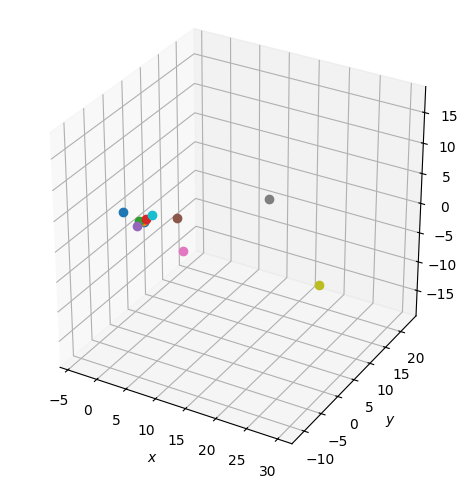

In [5]:
system.plot_3d_system()

### Launching simulation

In [6]:
tf = gs.years_to_days(1000.0)  # The default units is AU, solar mass, and days

acc_param, integrator_param, output_param, settings = gs.get_new_parameters()
integrator_param.integrator = "leapfrog"
integrator_param.dt = 0.1

output_param.method = "csv"
output_param.output_interval = tf / 2000.0

In [7]:
gs.launch_simulation(system, acc_param, integrator_param, output_param, settings, tf)

    Directory for storing snapshots already exists. The files will be overwritten. Directory: "/Users/alvinng/Desktop/cuhk/gravity-simulator/Final Project/gravity-simulator/examples/tmp/".


-----------------------------------------------------------------
                                              __                   
    __   _ __    __     __  __           ____/\_\    ___ ___       
  /'_ `\/\`'__\/'__`\  /\ \/\ \         /',__\/\ \ /' __` __`\     
 /\ \L\ \ \ \//\ \L\.\_\ \ \_/ |       /\__, `\ \ \/\ \/\ \/\ \    
 \ \____ \ \_\\ \__/.\_\\ \___/        \/\____/\ \_\ \_\ \_\ \_\   
  \/___L\ \/_/ \/__/\/_/ \/__/   _______\/___/  \/_/\/_/\/_/\/_/   
    /\____/                     /\______\                          
    \_/__/                      \/______/                          


grav_sim version 0.0.1

Operating System: MacOS
Compilation Info:
  Compiled with OpenMP: false
  Compiled with HDF5: false
  Compiled with FFTW3: false

Build time: Apr 11 2025 11:49:33
Compiler: Clang (version: 15)
-----------------------------------------------------------------
Simulation parameters:
  tf: 365242

System:
  Number of particles: 11
  Gravitational constant: 0.000295

In [8]:
G, sol_time, sol_dt, sol_particle_ids, sol_state = gs.read_csv_data(
    output_param.output_dir
)
print(f"Data size = {len(sol_state)}")
print(G)
print(sol_time.shape)
print(sol_dt.shape)
print(sol_particle_ids.shape)
print(sol_state.shape)

Data size = 2000
0.0002959122082841195
(2000,)
(2000,)
(11,)
(2000, 11, 7)


### Plotting trajectories

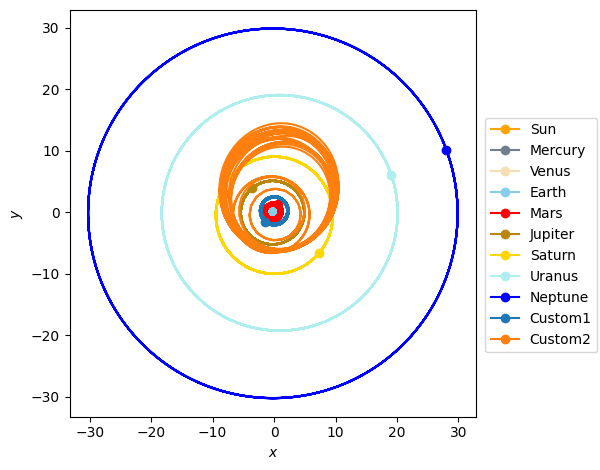

In [9]:
gs.plot_2d_trajectory(
    sol_state,
    colors=[
        "orange",
        "slategrey",
        "wheat",
        "skyblue",
        "red",
        "darkgoldenrod",
        "gold",
        "paleturquoise",
        "blue",
        None,
        None,
    ],
    labels=[
        "Sun",
        "Mercury",
        "Venus",
        "Earth",
        "Mars",
        "Jupiter",
        "Saturn",
        "Uranus",
        "Neptune",
        "Custom1",
        "Custom2",
    ],
    legend=True,
)

### More plots

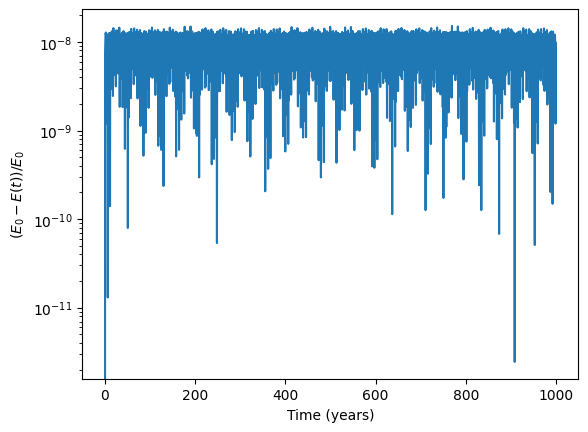

In [10]:
sol_energy = gs.compute_energy(sol_state, G)
gs.plot_rel_energy_error(
    sol_energy=sol_energy,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
)

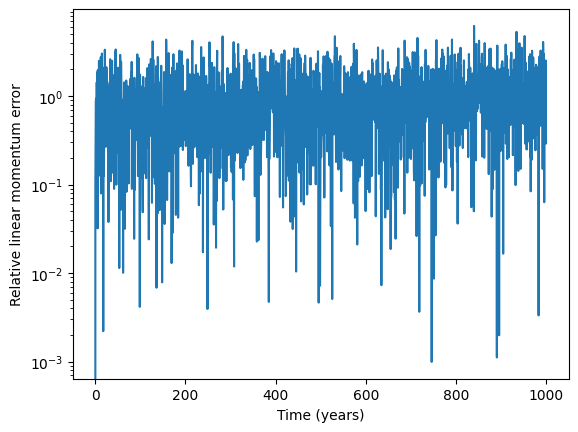

In [11]:
sol_linear_momentum = gs.compute_linear_momentum(sol_state)
gs.plot_rel_linear_momentum_error(
    sol_linear_momentum=sol_linear_momentum,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
)

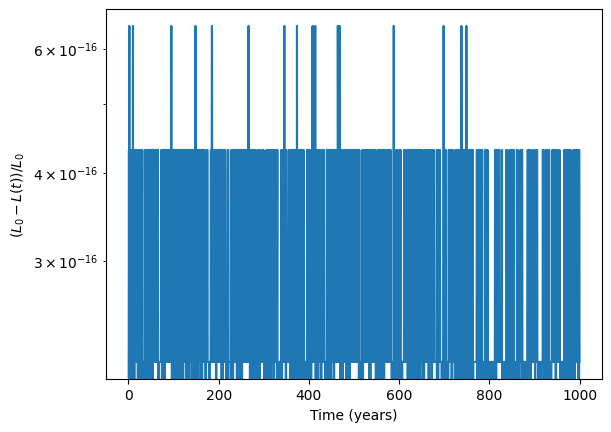

In [12]:
sol_angular_momentum = gs.compute_angular_momentum(sol_state)
gs.plot_rel_angular_momentum_error(
    sol_angular_momentum=sol_angular_momentum,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
)

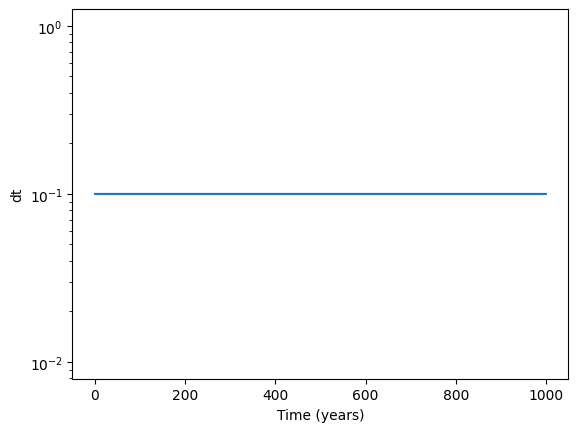

In [13]:
gs.plot_quantity_against_time(
    quantity=sol_dt[1:],
    is_log_y=True,
    sol_time=gs.days_to_years(sol_time[1:]),
    xlabel="Time (years)",
    ylabel="dt",
)

Delete the snapshot data

In [14]:
gs.delete_snapshots(output_dir=output_param.output_dir)

### Adaptive step size integrators

When using adaptive step size integrators, we provide tolerance rather than $\text{d}t$ to control the step size.
| Adaptive step size integrators | Recommended tolerance* |
|:-----------|:-------------|
| Runge–Kutta–Fehlberg 4(5) | $10^{-8}$ to $10^{-14}$ |
| Dormand–Prince method (DOPRI) 5(4) | $10^{-8}$ to $10^{-14}$ |
| Verner's method (DVERK) 6(5) | $10^{-8}$ to $10^{-14}$ |
| Runge–Kutta–Fehlberg 7(8) | $10^{-4}$ to $10^{-8}$ |
| IAS15 | $10^{-9}$ |

*For reference only

Using pyth-3-body, a highly chaotic system, we can easily see the difference between adaptive step size integrators and fixed step size integrators.

For RK4, the largest $\text{d}t$ we can use for this system is 2e-8.

In [15]:
### Crate system ###
IAS15_system = gs.get_built_in_system("pyth-3-body")


### Set parameters ###
tf = 70.0  # The default units is AU, solar mass, and days

acc_param, integrator_param, output_param, settings = gs.get_new_parameters()
integrator_param.integrator = "ias15"
integrator_param.tolerance = 1e-9

output_param.method = "csv"
output_param.output_interval = tf / 2000.0

### Launch simulation ###
gs.launch_simulation(IAS15_system, acc_param, integrator_param, output_param, settings, tf)

    Directory for storing snapshots already exists. The files will be overwritten. Directory: "/Users/alvinng/Desktop/cuhk/gravity-simulator/Final Project/gravity-simulator/examples/tmp/".


-----------------------------------------------------------------
                                              __                   
    __   _ __    __     __  __           ____/\_\    ___ ___       
  /'_ `\/\`'__\/'__`\  /\ \/\ \         /',__\/\ \ /' __` __`\     
 /\ \L\ \ \ \//\ \L\.\_\ \ \_/ |       /\__, `\ \ \/\ \/\ \/\ \    
 \ \____ \ \_\\ \__/.\_\\ \___/        \/\____/\ \_\ \_\ \_\ \_\   
  \/___L\ \/_/ \/__/\/_/ \/__/   _______\/___/  \/_/\/_/\/_/\/_/   
    /\____/                     /\______\                          
    \_/__/                      \/______/                          


grav_sim version 0.0.1

Operating System: MacOS
Compilation Info:
  Compiled with OpenMP: false
  Compiled with HDF5: false
  Compiled with FFTW3: false

Build time: Apr 11 2025 11:49:33
Compiler: Clang (version: 15)
-----------------------------------------------------------------
Simulation parameters:
  tf: 70

System:
  Number of particles: 3
  Gravitational constant: 0.000295912



Plot the results

Data size = 2001
Trajectory:


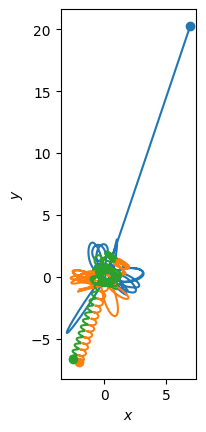

dt:


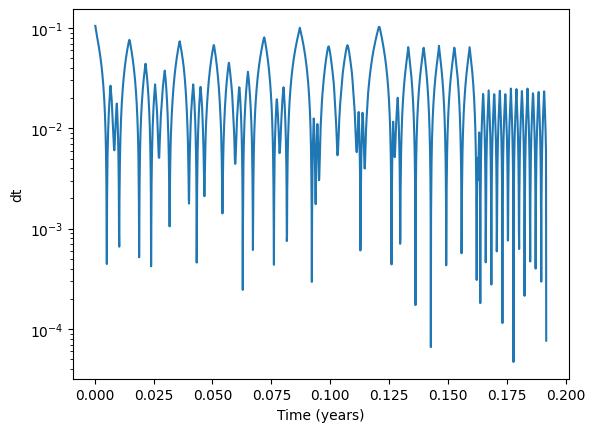

In [16]:
### Read results ###
G, sol_time, sol_dt, sol_particle_ids, sol_state = gs.read_csv_data(
    output_param.output_dir
)
print(f"Data size = {len(sol_state)}")

### Plot results ###
print("Trajectory:")
gs.plot_2d_trajectory(sol_state) # Trajectory

print("dt:")
gs.plot_quantity_against_time(
    quantity=sol_dt[1:],
    is_log_y=True,
    sol_time=gs.days_to_years(sol_time[1:]),
    xlabel="Time (years)",
    ylabel="dt",
)

# Delete snapshots
gs.delete_snapshots(output_dir=output_param.output_dir)

Let us try the solution again with RK4 with $\textrm{d} t = 10^{-5}$.

(As mentioned above, it would only work if $\textrm{d} t = 2 \times 10^{-8}$.)

In [17]:
### Crate system ###
RK4_system = gs.get_built_in_system("pyth-3-body")

### Set parameters ###
tf = 70.0  # The default units is AU, solar mass, and days

acc_param, integrator_param, output_param, settings = gs.get_new_parameters()
integrator_param.integrator = "rk4"
integrator_param.dt = 1e-5

output_param.method = "csv"
output_param.output_interval = tf / 2000.0

### Launch simulation ###
gs.launch_simulation(RK4_system, acc_param, integrator_param, output_param, settings, tf)

-----------------------------------------------------------------
                                              __                   
    __   _ __    __     __  __           ____/\_\    ___ ___       
  /'_ `\/\`'__\/'__`\  /\ \/\ \         /',__\/\ \ /' __` __`\     
 /\ \L\ \ \ \//\ \L\.\_\ \ \_/ |       /\__, `\ \ \/\ \/\ \/\ \    
 \ \____ \ \_\\ \__/.\_\\ \___/        \/\____/\ \_\ \_\ \_\ \_\   
  \/___L\ \/_/ \/__/\/_/ \/__/   _______\/___/  \/_/\/_/\/_/\/_/   
    /\____/                     /\______\                          
    \_/__/                      \/______/                          


grav_sim version 0.0.1

Operating System: MacOS
Compilation Info:
  Compiled with OpenMP: false
  Compiled with HDF5: false
  Compiled with FFTW3: false

Build time: Apr 11 2025 11:49:33
Compiler: Clang (version: 15)
-----------------------------------------------------------------
Simulation parameters:
  tf: 70

System:
  Number of particles: 3
  Gravitational constant: 0.000295912



    Directory for storing snapshots already exists. The files will be overwritten. Directory: "/Users/alvinng/Desktop/cuhk/gravity-simulator/Final Project/gravity-simulator/examples/tmp/".


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  96% • 00:00:01 • 00:00:00━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% • 00:00:01 • 00:00:00


Data size = 2001
Trajectory:


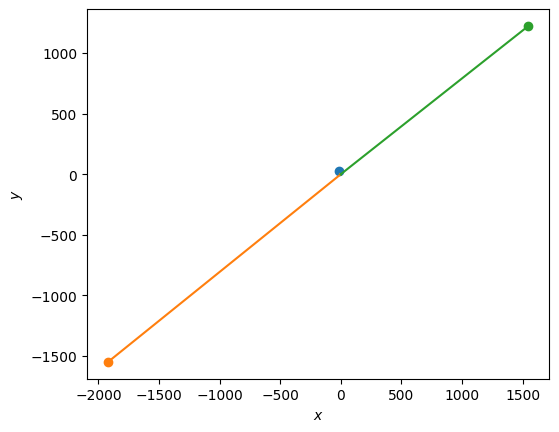

dt:


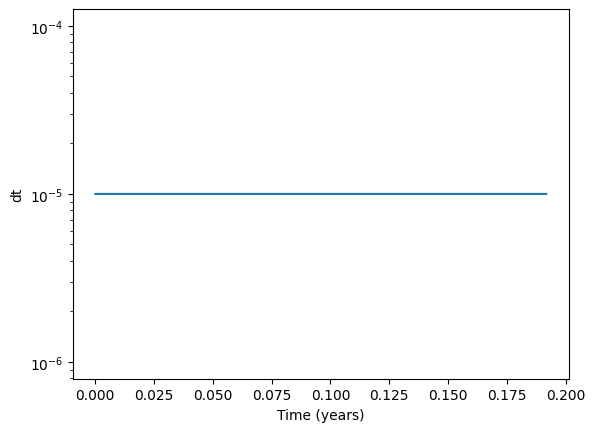

In [18]:
### Read results ###
G, sol_time, sol_dt, sol_particle_ids, sol_state = gs.read_csv_data(
    output_param.output_dir
)
print(f"Data size = {len(sol_state)}")

### Plot results ###
print("Trajectory:")
gs.plot_2d_trajectory(sol_state) # Trajectory

print("dt:")
gs.plot_quantity_against_time(
    quantity=sol_dt[1:],
    is_log_y=True,
    sol_time=gs.days_to_years(sol_time[1:]),
    xlabel="Time (years)",
    ylabel="dt",
)

# Delete snapshots
gs.delete_snapshots(output_dir=output_param.output_dir)

### WHFast
WHFast is a symplectic integrator. It is very useful for central mass systems, such as the solar system. Even when using a relatively large dt like 5 days, it can still return a adequate result, given that there are no close encounters and the eccentricities are low.

In [19]:
WHFast_system = gs.get_built_in_system("solar_system")

tf = gs.years_to_days(1000.0) # The default units is AU, solar mass, and days

acc_param, integrator_param, output_param, settings = gs.get_new_parameters()
integrator_param.integrator = "whfast"
integrator_param.dt = 5.0

output_param.method = "csv"
output_param.output_interval = tf / 2000.0

### Launch simulation ###
gs.launch_simulation(WHFast_system, acc_param, integrator_param, output_param, settings, tf)

-----------------------------------------------------------------
                                              __                   
    __   _ __    __     __  __           ____/\_\    ___ ___       
  /'_ `\/\`'__\/'__`\  /\ \/\ \         /',__\/\ \ /' __` __`\     
 /\ \L\ \ \ \//\ \L\.\_\ \ \_/ |       /\__, `\ \ \/\ \/\ \/\ \    
 \ \____ \ \_\\ \__/.\_\\ \___/        \/\____/\ \_\ \_\ \_\ \_\   
  \/___L\ \/_/ \/__/\/_/ \/__/   _______\/___/  \/_/\/_/\/_/\/_/   
    /\____/                     /\______\                          
    \_/__/                      \/______/                          


grav_sim version 0.0.1

Operating System: MacOS
Compilation Info:
  Compiled with OpenMP: false
  Compiled with HDF5: false
  Compiled with FFTW3: false

Build time: Apr 11 2025 11:49:33
Compiler: Clang (version: 15)
-----------------------------------------------------------------
Simulation parameters:
  tf: 365242

System:
  Number of particles: 9
  Gravitational constant: 0.0002959

    Directory for storing snapshots already exists. The files will be overwritten. Directory: "/Users/alvinng/Desktop/cuhk/gravity-simulator/Final Project/gravity-simulator/examples/tmp/".


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% • 00:00:00 • --:--:--


#### Plot the results

Data size = 2000
Trajectory:


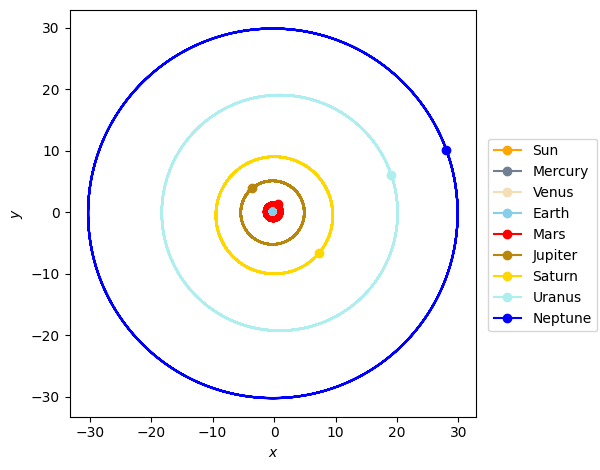

In [20]:
### Read results ###
G, sol_time, sol_dt, sol_particle_ids, sol_state = gs.read_csv_data(
    output_param.output_dir
)
print(f"Data size = {len(sol_state)}")

### Plot results ###
print("Trajectory:")
gs.plot_2d_trajectory(
    sol_state,
    colors=[
        "orange",
        "slategrey",
        "wheat",
        "skyblue",
        "red",
        "darkgoldenrod",
        "gold",
        "paleturquoise",
        "blue",
        None,
        None,
    ],
    labels=[
        "Sun",
        "Mercury",
        "Venus",
        "Earth",
        "Mars",
        "Jupiter",
        "Saturn",
        "Uranus",
        "Neptune",
        "Custom1",
        "Custom2",
    ],
    legend=True,
) # Trajectory

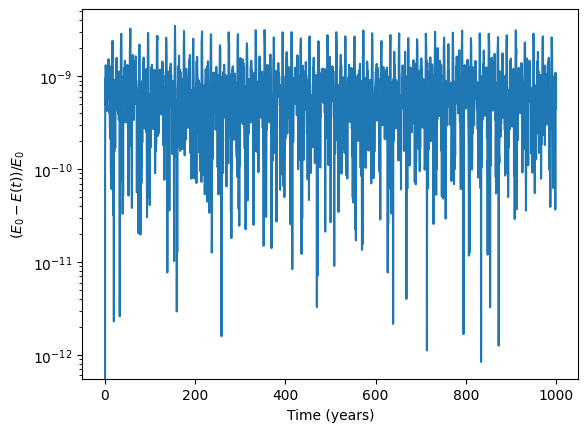

In [21]:
sol_energy = gs.compute_energy(sol_state, G)
gs.plot_rel_energy_error(
    sol_energy=sol_energy,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
)

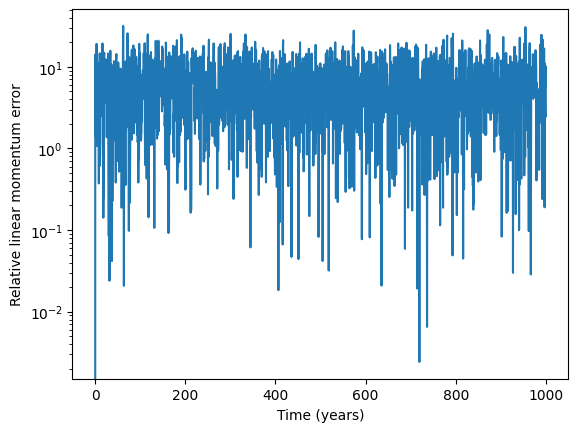

In [22]:
sol_linear_momentum = gs.compute_linear_momentum(sol_state)
gs.plot_rel_linear_momentum_error(
    sol_linear_momentum=sol_linear_momentum,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
)

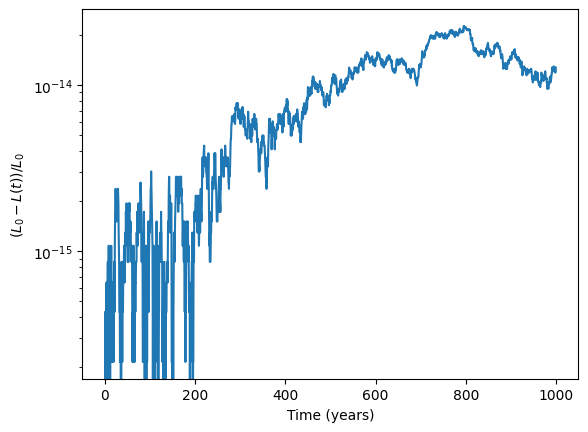

In [23]:
sol_angular_momentum = gs.compute_angular_momentum(sol_state)
gs.plot_rel_angular_momentum_error(
    sol_angular_momentum=sol_angular_momentum,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
)

In [24]:
gs.delete_snapshots(output_dir=output_param.output_dir)

# END
Here is the end of the tutorial. Check out other projects in the `examples` folder for more advanced usage. Enjoy!